| **Chapter**                   | 5:  Multi-pathogen dynamics                           |
| ----------------------------- | ----------------------------------------------------- |
| **Computational Note**        | 5.x: No-coinfection no-cross immunity                 |
| **Package prerequisites**     | None                                                  |


# No-coinfection no-cross immunity

## Two-pathogen no-coinfection no-cross-immunity

The two-pathogen model is governed by the following system of ODEs:

\begin{equation}
        \begin{aligned}
        \frac{dN_{S,S}}{dt} &= - \beta_a N_{S,S} I_a - \beta_b N_{S,S} I_b   \\
        \frac{dN_{I,S}}{dt} &= \beta_a N_{S,S} I_a - \gamma_a N_{I,S}        \\
        \frac{dN_{R,S}}{dt} &= \gamma_a N_{I,S} - \beta_b N_{R,S} I_b        \\
        \frac{dN_{S,I}}{dt} &= \beta_b N_{S,S} I_b - \gamma_b N_{S, I}       \\
        \frac{dN_{R,I}}{dt} &= \beta_b N_{R,S} I_b - \gamma_b N_{R, I}       \\
        \frac{dN_{S,R}}{dt} &= \gamma_a N_{I,S} - \beta_a N_{S,R} I_a        \\
        \frac{dN_{I,R}}{dt} &= \beta_a N_{S,R} I_a - \gamma_a N_{I,R}        \\
        \frac{dN_{R,R}}{dt} &= \gamma_a N_{I,R} + \gamma_b N_{R,I}
        \end{aligned}
\end{equation}

We assume a constant population with a turnover rate of $\mu = \nu = 10^{-4}$ persons per day and the following pathogenic parameters:

|  | $\beta$      | $\gamma$       | $\mathfrak{R}_0$ |
|----------|-----------|-----------|----|
| $a$  | 1.5 | 1 | 1.5 |
| $b$  | 0.4 | 0.2 | 2 |

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
from matplotlib import pyplot as plt

COLORS = {"S": "#2f4b7c",
          "E": "#ffa600",
          "I": "#f95d6a",
          "R": "#a05195",
          "D": "#003f5c",
          "C": "#ff7c43",
          "X": "#665191",
          "Y": "#d45087"}

In [2]:
def deriv(t, y, beta, gamma, mu, nu):

    SS, IS, RS, SI, RI, SR, IR, RR = y

    I = np.array([[IS + IR], [SI + RI]])
    gmat = gamma * np.array([[IS, SI], [IR, RI]])
    bmat = beta * I * np.array([[SS, SS], [SR, RS]])

    dNSSdt = nu - (beta * SS).dot(I) - mu * SS
    dNISdt = bmat[0,0] - gmat[0,0] - mu * IS
    dNRSdt = gmat[0,0] - bmat[1,1] - mu * RS
    dNSIdt = bmat[0,1] - gmat[0,1] - mu * SI
    dNRIdt = bmat[1,1] - gmat[1,1] - mu * RI
    dNSRdt = gmat[0,0] - bmat[1,0] - mu * SR
    dNIRdt = bmat[1,0] - gmat[1,0] - mu * IR
    dNRRdt = gmat[1:,].sum() - mu * RR

    return dNSSdt, dNISdt, dNRSdt, dNSIdt, dNRIdt, dNSRdt, dNIRdt, dNRRdt

In [3]:
I_0 = np.array([1e-6, 1e-6])
SS_0 = 1 - I_0.sum()

y_0 = np.array([SS_0, I_0[0], 0, I_0[1], 0, 0, 0, 0])

beta = np.array([1.5, 0.4])
gamma = np.array([1, 0.2])

mu, nu = 1e-4, 1e-4

In [4]:
res = solve_ivp(fun=deriv, t_span = (0, 100), y0=y_0, args=(beta, gamma, mu, nu), max_step=1)

/var/folders/1d/97x3559931s0_6hkz64q4zth0000gn/T/ipykernel_26402/627037547.py:19: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')


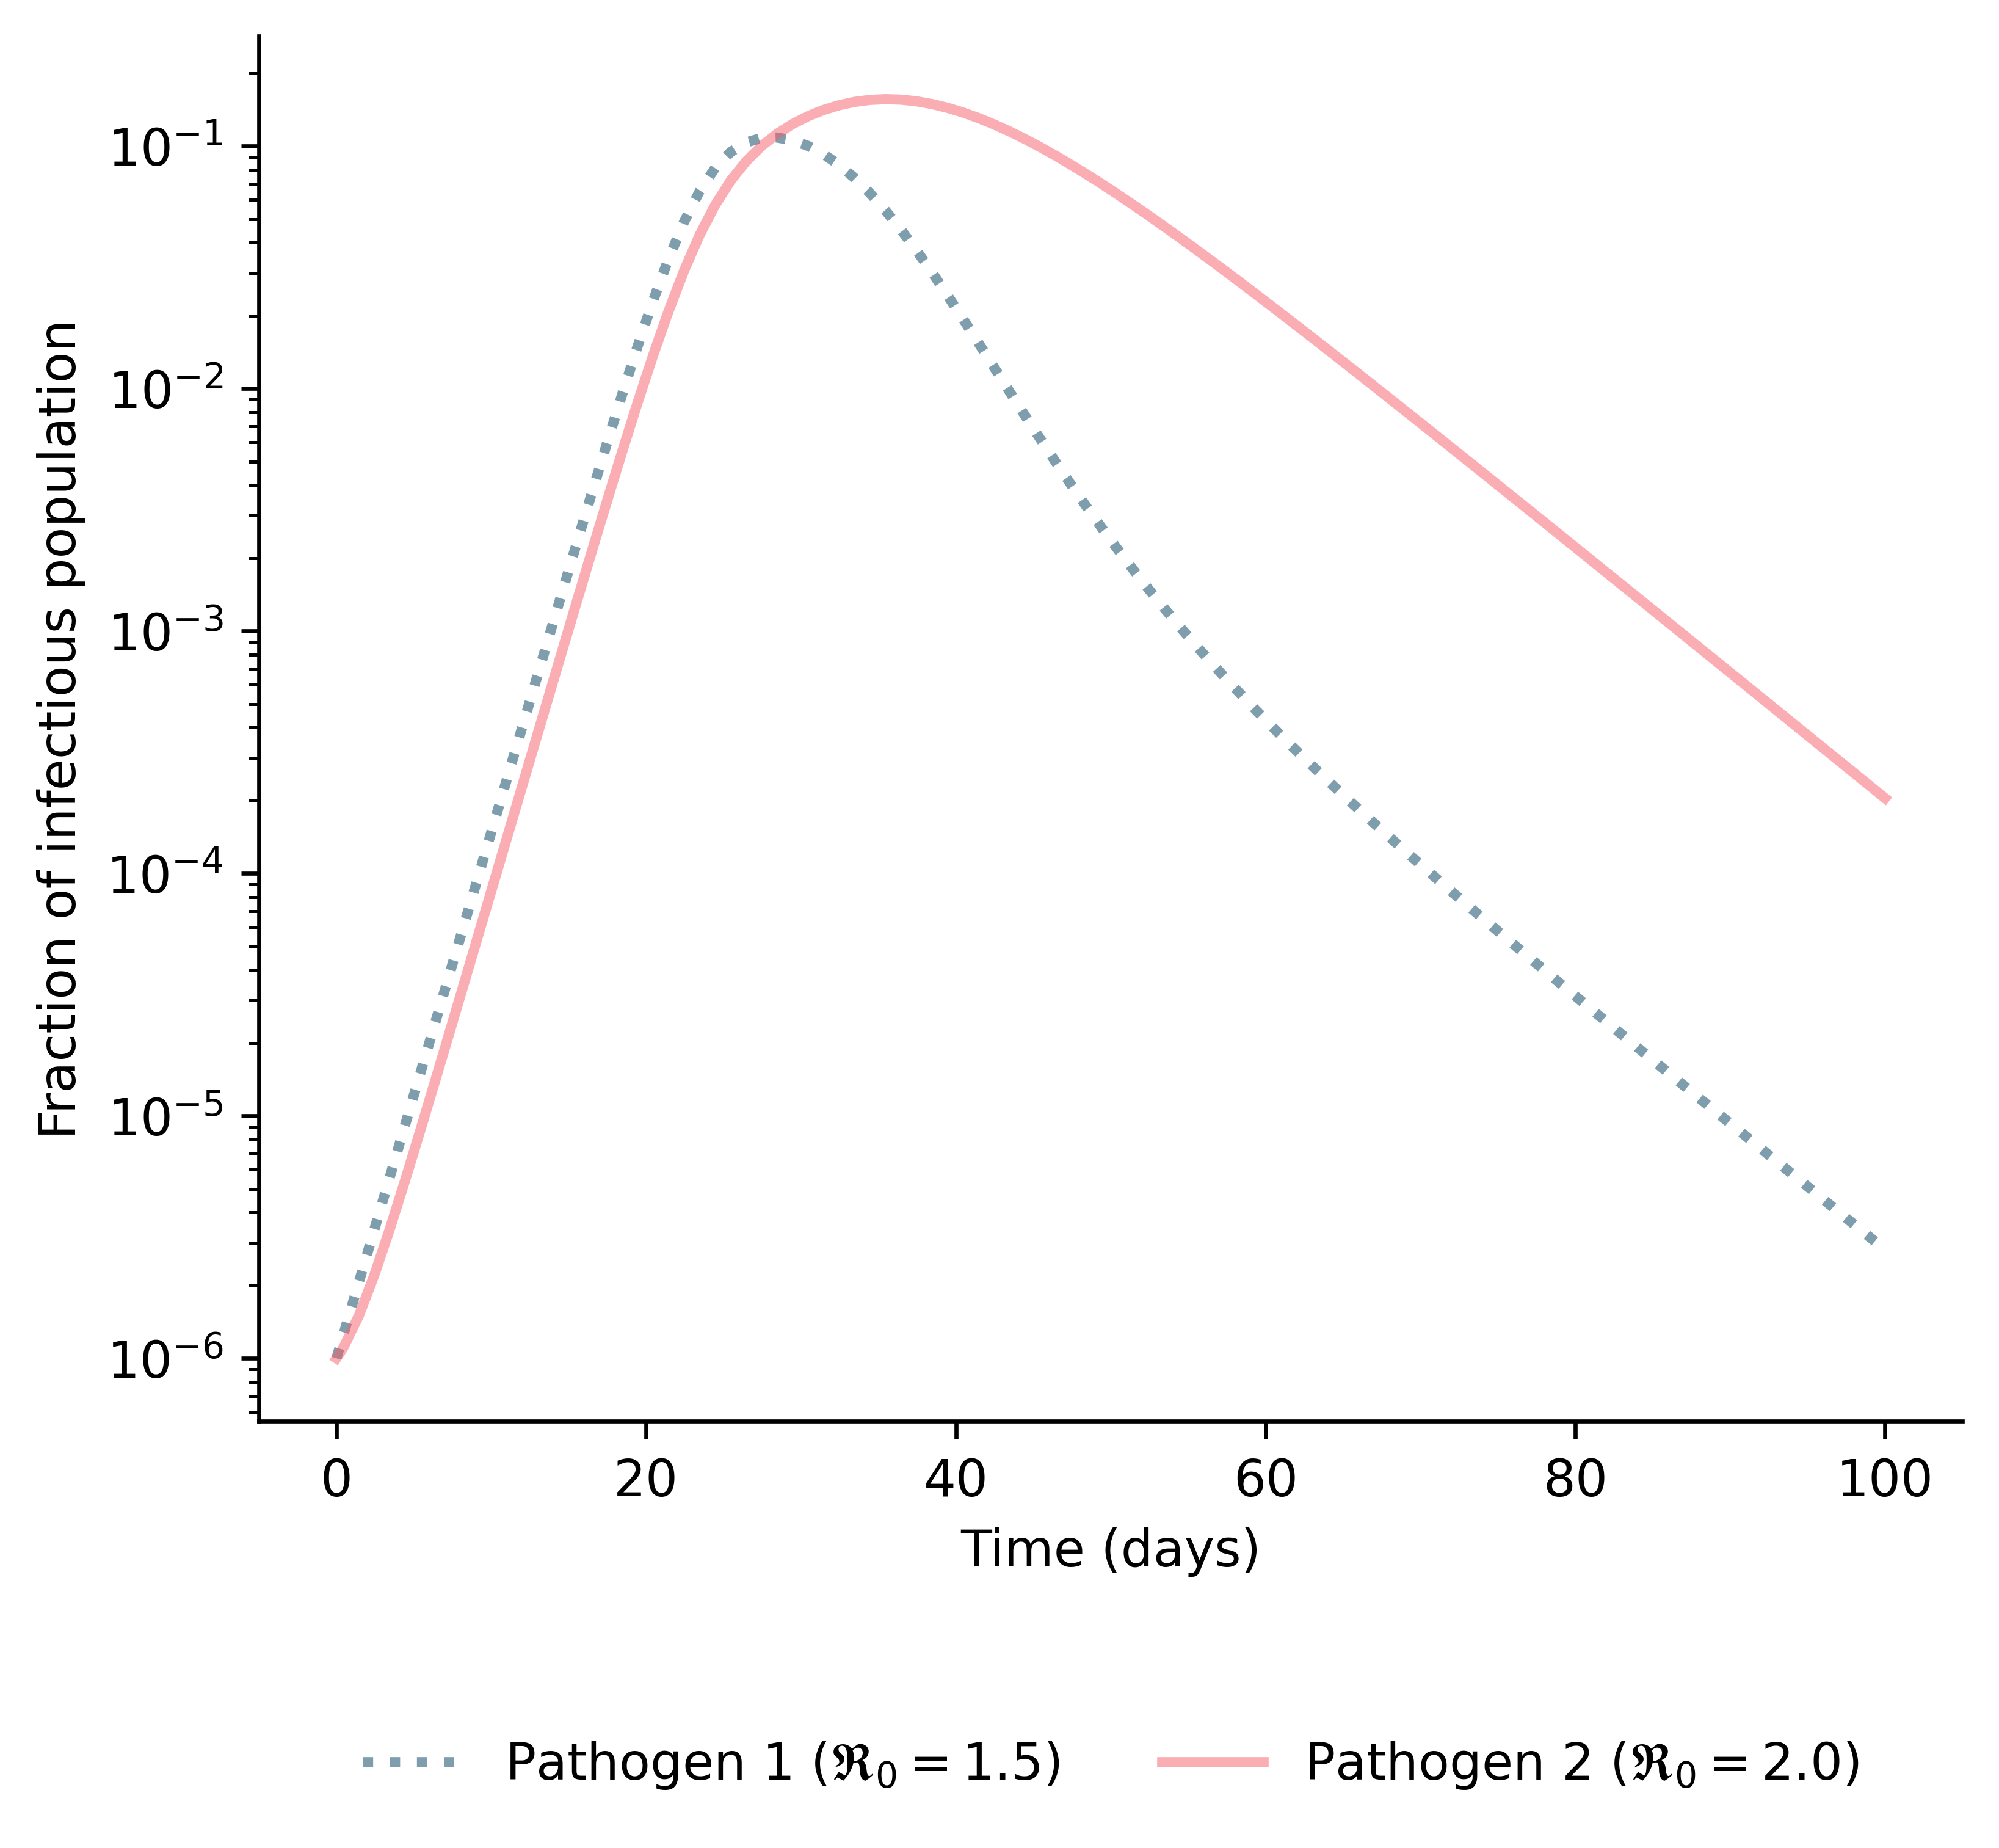

In [5]:
NSS, NIS, NRS, NSI, NRI, NSR, NIR, NRR = res.y

fig = plt.figure(facecolor="w", figsize=(6, 6), dpi=600)
ax = fig.add_subplot(111, axisbelow=True)

ax.plot(res.t, NIS + NIR, color=COLORS["D"], alpha=0.5, lw=2, linestyle=":", label="Pathogen 1 ($\mathfrak{R}_0 = 1.5$)")
ax.plot(res.t, NSI + NRI, color=COLORS["I"], alpha=0.5, lw=2, label="Pathogen 2 ($\mathfrak{R}_0 = 2.0$)")


# ax.fill_between(res.t, 0, S, color=COLORS["S"], alpha=0.15)
# ax.fill_between(res.t, 0, I, color=COLORS["I"], alpha=0.15)
# ax.fill_between(res.t, D, R + D, color=COLORS["R"], alpha=0.15, label="Recovered")
# ax.fill_between(res.t, 0, D, color=COLORS["D"], alpha=0.15, label="Deceased")

ax.set_xlabel('Time (days)')
ax.set_ylabel("Fraction of infectious population")
# ax.set_ylim(0, 1.0)
ax.set_yscale("log")
ax.grid(b=True, which='major', c='w', lw=2, ls='-')

for spine in ("top", "right"):
    ax.spines[spine].set_visible(False)

legend = ax.legend()
legend.get_frame().set_alpha(0.5)
plt.legend(title='', bbox_to_anchor=(0.5, -0.3), loc="lower center", ncol=2, frameon=False)

fig.subplots_adjust(bottom=0.25)

plt.savefig("no_cross_immunity.pdf")
plt.show()